# Problem statement
To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

## Building a simple CNN model

### Environment Configuration

In [ ]:
# Environment Configurations

# Enable the following if this is executed in Colab
ENV='COLAB'

# Enable the following if this notebook is executed in Kaggle
# env = 'KAGGLE'

#### **Task 1: Reading the data**

Importing all the important libraries

In [ ]:
# Importing the libraries for file management
import pathlib
import os

# Importing libraries for efficient computation and data manipulation
import numpy as np
import pandas as pd

# Importing libraries for plotting, visalization and image processing
import matplotlib.pyplot as plt
import PIL

In [ ]:
# Importing Tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Input, Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory

from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Rescaling 
from tensorflow.keras.layers import AvgPool2D, Concatenate, LeakyReLU
from tensorflow.keras.layers import BatchNormalization, Flatten, Dropout
from tensorflow.keras.layers import Activation

from tensorflow.keras.callbacks import TensorBoard

In [ ]:
# Importing library to calculate recall for multiclass classification
from sklearn.metrics import recall_score, balanced_accuracy_score

In [ ]:
# Setting seed values
tf.random.set_seed(123)
np.random.seed(123)
print(tf.__version__)

2.8.2


You are expected to load the data in the Colab environment by mounting the Google Drive. This will allow you to access the files from Google drive through Colab. 

Steps:
1. Upload the dataset in your Google Drive in a separate folder. Avoid spaces in the name of the folder or the zip file.
2. Mount the Google Drive using the code given below.
3. Unzip the file to access images.
4. Check the path for the datasets - train and test.


In [ ]:
# Uncomment and run if the notebook has to be executed again. 
# This deletes the image dataset folder so that the process of 
# downloading starts from scratch

#!rm -rf "/content/Skin cancer ISIC The International Skin Imaging Collaboration"

Note: The code is commented for you to learn and then make edits to execute the command.

In [ ]:
## If you are using the data by mounting the google drive, use the following:
if ENV == 'COLAB':
  from google.colab import drive
  drive.mount('/content/gdrive')
else:
  # in Kaggle, we will have to download the file directly using another tool
  # called gdown
  !pip install gdown
  # Download the dataset in zipped format in Kaggle working folder
  !gdown https://drive.google.com/uc?id=1xLfSQUGDl8ezNNbUkpuHOYvSpTyxVhCs

## Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Unzipping the files
# To do: Update the folder name and file name
#!unzip -o "/content/gdrive/MyDrive/Colab Notebooks/upgrad_Melanoma_dataset/CNN_assignment.zip"
if ENV=='KAGGLE':
    #Unzip command for Kaggle
    !unzip -o /kaggle/working/CNN_assignment.zip
else:
    !unzip -o "/content/gdrive/MyDrive/Colab Notebooks/upgrad_Melanoma_dataset/CNN_assignment.zip"


Archive:  /content/gdrive/MyDrive/Colab Notebooks/upgrad_Melanoma_dataset/CNN_assignment.zip
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024654.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic 

Check the path mentioned in the output: `Skin cancer ISIC The International Skin Imaging Collaboration`

Provide the path for train and test images using pathlib library.

In [ ]:
# Defining the path for train and test images
## To do: Update the paths of the train and test dataset

# Defining the path for train and test images
## To do: Update the paths of the train and test dataset

if ENV=='COLAB':
    #base directory for google colab
    base_dir='/content'
else:
    #base directory for Kaggle
    base_dir='.'

train_path = 'Skin cancer ISIC The International Skin Imaging Collaboration/Train'
test_path = 'Skin cancer ISIC The International Skin Imaging Collaboration/Test'

data_dir_train = pathlib.Path(os.path.join(base_dir, train_path))
data_dir_test = pathlib.Path(os.path.join(base_dir,test_path))

Check whether the data has been extracted successfully.

In [ ]:
# Train and test images
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print("Train images:\t", image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print("Test images:\t", image_count_test)

Train images:	 2239
Test images:	 118


#### **Task 2: Loading the images using keras.preprocessing**

The images are still not loaded in the Colab environment. We have extracted them from the zip file. Now, you are expected to load them in the Colab notebook using the `preprocessing` attribute.

Let's load these images off disk using the helpful image_dataset_from_directory utility. You can refer to the following [link](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory) to know more about the function. You can even refer to the additional notebooks on the page to check how the variables are defined.



Defining the parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

Divide the training set into 2 parts: 
*   80% for training 
*   20% for validation



In [ ]:
## Write your code for train dataset here.
## Note: Use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note: Make sure you resize your images to the size: img_height*img_width, while specifying the variable

train_ds = image_dataset_from_directory(data_dir_train,
                                        labels='inferred', 
                                        label_mode='categorical',
                                        batch_size=batch_size,
                                        image_size=(img_height, img_width),
                                        color_mode='rgb',
                                        shuffle=True, 
                                        seed=123,
                                        validation_split=0.2,
                                        subset= 'training'
                                        )

print(train_ds)


Found 2239 files belonging to 9 classes.
Using 1792 files for training.
<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 9), dtype=tf.float32, name=None))>


In [ ]:
## Write your code for validation dataset here.
## Note: Use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note: Make sure you resize your images to the size: img_height*img_width, while specifying the variable

val_ds = image_dataset_from_directory(data_dir_train,
                                        labels='inferred', 
                                      label_mode='categorical',
                                        batch_size=batch_size,
                                        image_size=(img_height, img_width),
                                        color_mode='rgb',
                                        shuffle=True, 
                                        seed=123,
                                      validation_split=0.2,
                                        subset= 'validation'
                                        )
val_ds

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 9), dtype=tf.float32, name=None))>

In [ ]:
# Reading the test dataset to keep it away from the model and use for the final 
# metric generation
test_ds = image_dataset_from_directory(data_dir_test,
                                        labels='inferred', 
                                        label_mode='categorical',
                                        batch_size=batch_size,
                                        image_size=(img_height, img_width),
                                        color_mode='rgb',
                                        shuffle=True, 
                                        seed=123
                                        )

Found 118 files belonging to 9 classes.


In [ ]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the 'class_names' attribute associated with the training and validation datasets. 
# These correspond to the directory names in alphabetical order.

class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


#### **Task 3: Visualize the data**

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

Write the code to visualize one instance of all the nine classes present in the dataset

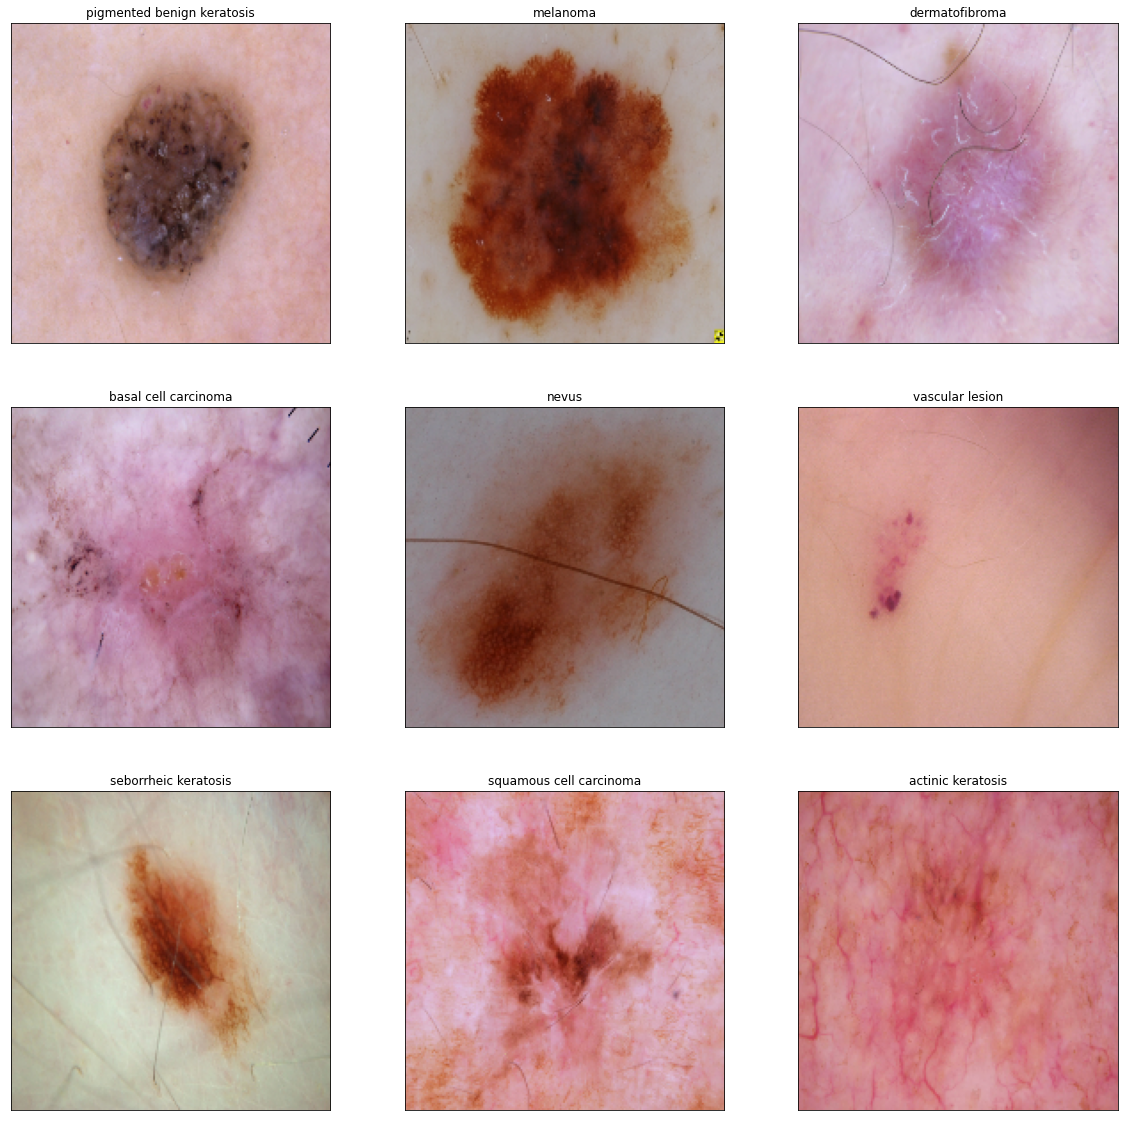

In [ ]:

### Your code goes here; you can use either training or validation data to 
# visualize the images.
plt.figure(figsize=(20,20))
# A list to keep track of which class has been plotted
image_index = []
# index for each of the subplot
plot_index = 1
# Loop through the training dataset
for i, (images, labels) in enumerate(train_ds):
  # Loop through labels that we got in the batch
  for index, class_index in  enumerate(list(np.argmax(\
                                      labels.numpy().astype('uint8'), 
                                      axis=1))):
    # Check if the class_index was already displayed or not
    if class_index not in image_index:
      # If the class was not plotted, then display the image
      # Store the class that was found
      image_index.append(class_index)
      # Display the image and add the title, turn off the ticks
      plt.subplot(3,3,plot_index)
      plt.imshow(images[index].numpy().astype(np.uint8))
      plt.title(class_names[class_index])
      plt.xticks(ticks=[])
      plt.yticks(ticks=[])
      # Increment the plot_index for the next image
      plot_index += 1
      # End of if condition
    # End of looping thru labels in the batch
  # Check if 9 classes have been displayed, break out of loop if so
  if plot_index > 9:  
    plt.show()
    break

#### Configure the dataset for performance
Let's make sure to use buffered prefetching so you can yield data from disk without having I/O become blocking. These are two important methods you should use when loading data.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch. This will ensure the dataset does not become a bottleneck while training your model. If your dataset is too large to fit into memory, you can also use this method to create a performant on-disk cache.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

#### **Task 4: Create the model**
Create a CNN model, which can accurately detect 9 classes present in the dataset. 


*   Note: The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`. Use `layers.experimental.preprocessing.Rescaling` for this purpose.

In [ ]:
### Your code goes here
input = Input(shape=(img_height, img_width, 3), batch_size=batch_size, name='input')
rescale = Rescaling(scale=1./255, name='rescale')(input) # output 180x180x3
x = Conv2D(16, 3, strides=1, padding='same', activation='relu')(rescale) # 180x180x16
x = MaxPooling2D(2)(x) # 90x90x16
x = Conv2D(32, 3, strides=1, padding='same', activation='relu')(x) # 90x90x32
x = MaxPooling2D(2)(x) # 45x45x32
x = Conv2D(64, 3, strides=1, padding='same', activation='relu')(x) # 45x45x64
x = MaxPooling2D(2)(x) # 22x22x64
x = Conv2D(64, 3, strides=1, padding='same', activation='relu')(x) # 22x22x64

x = Flatten()(x) # 1x30976
x = Dense(128, activation='relu')(x) # 1x128

x = Dense(9, activation='softmax')(x) # 1x9 
model_1 = Model(inputs = input, outputs = x)


#### **Question**: 
Explain the following elements associated with the problem:
1.   Selection of stride value (Reason for using a high/low value)
2.   Padding strategy used (Same/Valid)

#### Answer
1. Stride is kept low at a default of 1, so that features are computed at as granular level as possible
2. Padding strategy for convolution layer is selected as **Same** to ensure that length & width of input at a Convolution layer is same as that of the output of the layer

#### **Task 5: Compile the model**
Choose an appropirate optimiser and loss function for model training.

In [ ]:
### Choose an appropirate optimiser and loss function
optimizer = 'adam'

model_1.compile(optimizer = optimizer, 
              loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(32, 180, 180, 3)]       0         
                                                                 
 rescale (Rescaling)         (32, 180, 180, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 180, 180, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 90, 90, 16)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 90, 90, 32)          4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 45, 45, 32)         0         
 2D)                                                         

#### Train the model

In [ ]:
# The model needs to be trained for 20 epochs
epochs = 20

history = model_1.fit(
  train_ds,
  validation_data = val_ds,
  epochs=epochs, 
  callbacks = [TensorBoard(log_dir=os.path.join(base_dir,'logs',
                                                optimizer, 'model_1'),
                         histogram_freq=1
                         )]
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


56/56 [==============================] - 18s 107ms/step - loss: 2.0482 - accuracy: 0.2377 - val_loss: 1.9791 - val_accuracy: 0.2835
Epoch 2/20
56/56 [==============================] - 2s 36ms/step - loss: 1.8330 - accuracy: 0.3270 - val_loss: 1.6340 - val_accuracy: 0.4107
Epoch 3/20
56/56 [==============================] - 2s 36ms/step - loss: 1.6220 - accuracy: 0.4169 - val_loss: 1.6643 - val_accuracy: 0.4420
Epoch 4/20
56/56 [==============================] - 2s 42ms/step - loss: 1.5352 - accuracy: 0.4648 - val_loss: 1.5806 - val_accuracy: 0.4554
Epoch 5/20
56/56 [==============================] - 2s 39ms/step - loss: 1.4437 - accuracy: 0.4950 - val_loss: 1.4811 - val_accuracy: 0.5156
Epoch 6/20
56/56 [==============================] - 2s 35ms/step - loss: 1.3850 - accuracy: 0.5073 - val_loss: 1.4919 - val_accuracy: 0.4621
Epoch 7/20
56/56 [==============================] - 2s 35ms/step - loss: 1.3052 - accuracy: 0.5379 - val_loss: 1.4825 - val_accuracy: 0.5469
Epoch 8/20
56/56 [====

#### Visualizing training results

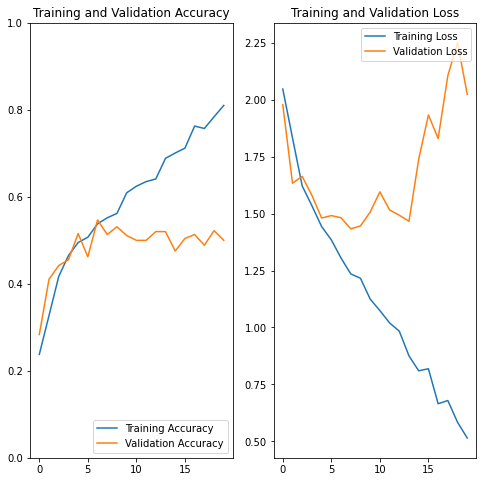

In [ ]:
# Graphs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylim([0., 1.0])
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Question**:
Write your findings after the model fit, see if there is an evidence of model overfit or underfit

#### **Answer**:
Model has overfit on the training dataset because training accuracy is close to 80% whereas validation accuracy is only around 50%

#### Model Evaluation

In [ ]:
# Evaluating the model against the Test dataset
model_eval = model_1.evaluate(test_ds, return_dict=True)
model_eval

4/4 [==============================] - 3s 66ms/step - loss: 5.2840 - accuracy: 0.2891


{'accuracy': 0.2890625, 'loss': 5.283966541290283}

In [ ]:
# Since the data may be imbalanced, calculating the accuracy
# taking this into account using balanced_accuracy_score

count = 0
y_true = np.array([])
y_pred = np.array([])
for images, labels in test_ds:
  y_true = np.concatenate((y_true, tf.argmax(labels, 1)))
  y_pred = np.concatenate((y_pred,tf.argmax(model_1.predict(images), 1)))
  
print("Balanced Accuracy score =", balanced_accuracy_score(
                list(y_true.astype('uint8')), 
                list(y_pred.astype('uint8'))
                ))


Balanced Accuracy score = 0.3171296296296296


## Data augmentation

Overfitting generally occurs when there are a small number of training examples. [Data augmentation](https://www.tensorflow.org/tutorials/images/data_augmentation) takes the approach of generating additional training data from your existing examples by augmenting them using random transformations that yield believable-looking images. This helps expose the model to more aspects of the data and generalize better.

In [ ]:
# After you have analysed the model fit history for presence of underfit 
# or overfit, choose an appropriate data augumentation strategy. 
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical", 
                                               input_shape=(img_height, img_width, 3)),
  layers.experimental.preprocessing.RandomRotation(0.3),
  layers.RandomZoom(0.3)
])






Let's visualize what a few augmented examples look like by applying data augmentation to the same image several times

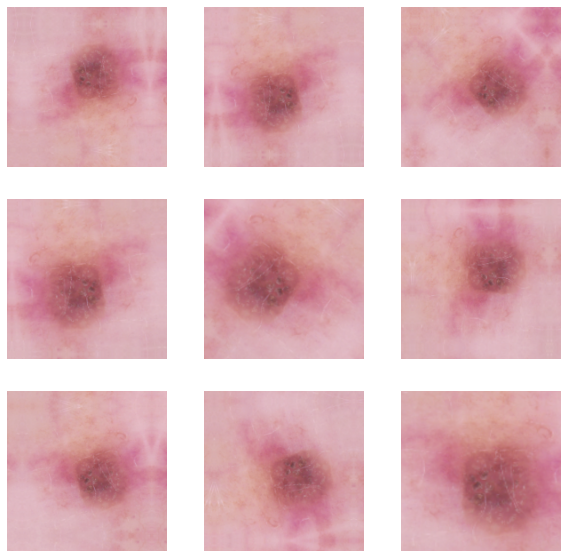

In [ ]:
# Visualizing how the augmentation strategy works for one instance of training image.

plt.figure(figsize=(10, 10))
for images, labels in train_ds:
  for i in range(9):
    augmented_image =  data_augmentation(tf.expand_dims(images[0], axis=0))
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(augmented_image.numpy().astype('uint8')[0])
    plt.axis('off')
  plt.show()
  break

#### **Task 6: Create, compile and train the model**

Model Definition

In [ ]:
## Your code goes here
## You should also include dropouts to tackle with overfitting. (compulsory)

### Your code goes here
input = Input(shape=(img_height, img_width, 3), name='input')
augmented = data_augmentation(input)
rescale = Rescaling(scale=1./255, name='rescale')(augmented) # output 180x180x3
x = Conv2D(16, 3, strides=1, padding='same', activation='relu')(rescale) # 180x180x16
x = BatchNormalization()(x) #180x180x16
x = MaxPooling2D(2)(x) # 90x90x16
x = Conv2D(32, 3, strides=1, padding='same', activation='relu')(x) # 90x90x32
x = BatchNormalization()(x) 
x = MaxPooling2D(2)(x) # 45x45x32
x = Conv2D(64, 3, strides=1, padding='same', activation='relu')(x) # 45x45x64
x = BatchNormalization()(x)
x = MaxPooling2D(2)(x) # 22x22x64
x = Conv2D(64, 3, strides=1, padding='same', activation='relu')(x) # 22x22x64
x = BatchNormalization()(x)

x = Flatten()(x) #1x30976
x = Dense(128, activation='relu')(x) # 1x128
x = Dropout(0.3)(x)

x = Dense(9, activation='softmax')(x) # 1x9
model_2 = Model(inputs = input, outputs = x)
model_2.summary()





Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 180, 180, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescale (Rescaling)         (None, 180, 180, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 180, 180, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                       

Compiling the model

In [ ]:
## Your code goes here

model_2.compile(optimizer = optimizer,
              loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

Training the model

In [ ]:
# Note: Train your model for 20 epochs
## Your code goes here

epochs = 20

history = model_2.fit(
  train_ds,
  validation_data = val_ds,
  batch_size = batch_size,
  epochs=epochs,
  callbacks = [TensorBoard(log_dir=os.path.join(base_dir,'logs',
                                                optimizer, 'model_2'),
                         histogram_freq=1
                         )]
)

Epoch 1/20
56/56 [==============================] - 4s 54ms/step - loss: 3.3514 - accuracy: 0.3203 - val_loss: 3.8944 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 3s 46ms/step - loss: 1.8851 - accuracy: 0.3504 - val_loss: 9.8378 - val_accuracy: 0.0470
Epoch 3/20
56/56 [==============================] - 3s 46ms/step - loss: 1.7977 - accuracy: 0.3839 - val_loss: 10.9672 - val_accuracy: 0.0626
Epoch 4/20
56/56 [==============================] - 3s 46ms/step - loss: 1.7283 - accuracy: 0.3772 - val_loss: 9.7089 - val_accuracy: 0.0559
Epoch 5/20
56/56 [==============================] - 3s 46ms/step - loss: 1.7056 - accuracy: 0.3923 - val_loss: 6.9971 - val_accuracy: 0.1723
Epoch 6/20
56/56 [==============================] - 3s 46ms/step - loss: 1.6739 - accuracy: 0.3901 - val_loss: 4.1591 - val_accuracy: 0.2237
Epoch 7/20
56/56 [==============================] - 3s 45ms/step - loss: 1.6596 - accuracy: 0.4118 - val_loss: 5.3888 - val_accuracy: 0.2752
Epoch 8/20
5

#### Visualizing the results

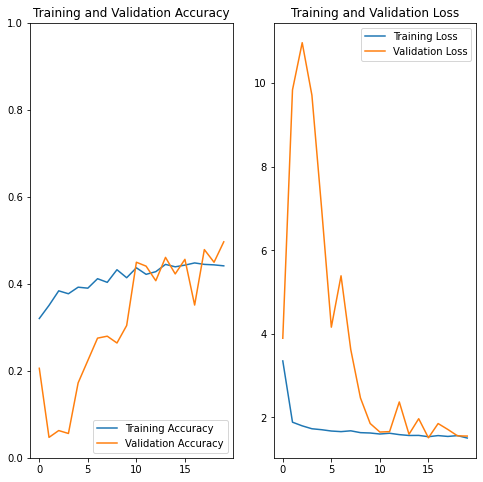

In [ ]:
# Graphs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.ylim([0,1.0])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Question**:
Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

### **Answer**:
* The model is not overfitting now as the training accuracy and validation training are close to each other
* Although there is some generalization of the model, the accuracy of the model is low at an overall level (~40% accuracy)

### Model Evaluation

In [ ]:
# Evaluating the model against the Test dataset
model_eval = model_2.evaluate(test_ds, return_dict=True)
model_eval

4/4 [==============================] - 3s 81ms/step - loss: 3.2486 - accuracy: 0.3644


{'accuracy': 0.3644067943096161, 'loss': 3.248570442199707}

In [ ]:
# Since the data may be imbalanced, calculating the accuracy
# taking this into account using balanced_accuracy_score
count = 0
y_true = np.array([])
y_pred = np.array([])
for images, labels in test_ds:
  y_true = np.concatenate((y_true, tf.argmax(labels, 1)))
  y_pred = np.concatenate((y_pred,tf.argmax(model_2.predict(images), 1)))
print("Balanced Accuracy score =", balanced_accuracy_score(
                list(y_true.astype('uint8')), 
                list(y_pred.astype('uint8'))
                ))


Balanced Accuracy score = 0.3587962962962963


## Distribution in the dataset

**Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

<br>

#### **Task 7: Find the distribution of classes in the training dataset.**

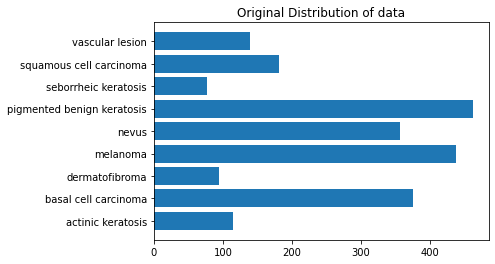

In [ ]:
## Your code goes here.
original_class_dist = dict()
# Going through each directory which is a class each
for dir in sorted(data_dir_train.iterdir()):
  original_class_dist[str(dir).split('/')[-1]] = len(list(pathlib.Path(dir).glob('*.jpg')))

original_class_dist
plt.figure()
plt.barh(list(original_class_dist.keys()), original_class_dist.values())
plt.title('Original Distribution of data')
#plt.xticks(rotation=20)
plt.show()


#### **Questions:**  
 - Which class has the least number of samples?
 - Which classes dominate the data in terms proportionate number of samples?


### Answer:
* Class with least samples:
 * seborrheic keratosis
* Classes with considerable number of samples:
 * basal cell carcinoma
 * pigmented benign keratosis
 * melanoma
 * nevus *(to a smaller extent)*

In [ ]:
# Create a DataFrame containing a mapping of each of the image path with 
# the belonging class "Lesion"
original_df = pd.DataFrame(columns=[ 'Lesion', 'Path'])
class_dist=dict()
for dir in data_dir_train.iterdir():
  class_dist[str(dir).split('/')[-1]] = list(pathlib.Path(dir).glob('*.jpg'))

for cls in class_dist.keys():
  temp_df = pd.DataFrame(columns=[ 'Lesion', 'Path'])
  temp_df['Path'] = class_dist[cls]
  temp_df['Lesion'] = cls
  original_df = pd.concat([original_df, temp_df])

print("Shape of original_df = ", original_df.shape)  
original_df.head()

Shape of original_df =  (2239, 2)


,Lesion,Path
0,melanoma,/content/Skin cancer ISIC The International Sk...
1,melanoma,/content/Skin cancer ISIC The International Sk...
2,melanoma,/content/Skin cancer ISIC The International Sk...
3,melanoma,/content/Skin cancer ISIC The International Sk...
4,melanoma,/content/Skin cancer ISIC The International Sk...


### **Task 8: Rectifying the class imbalance**
You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
# Provide the path for the training dataset
path_to_training_dataset=str(data_dir_train)
import Augmentor



In [ ]:
#! rm -rf "/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output"

path_to_training_dataset

'/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train'

In [ ]:

for i in class_names:
  p = Augmentor.Pipeline(os.path.join(path_to_training_dataset , i))
  p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
  p.sample(500)


    ## We are adding 500 samples per class to make sure that none of the classes are sparse.


Initialised with 114 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FD1CF693610>: 100%|██████████| 500/500 [00:17<00:00, 27.85 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FD1D0F80CD0>: 100%|██████████| 500/500 [00:16<00:00, 31.03 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FD1CF6F17D0>: 100%|██████████| 500/500 [00:18<00:00, 27.57 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FD1CF6F2CD0>: 100%|██████████| 500/500 [01:44<00:00,  4.79 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2048x1536 at 0x7FD261E65690>: 100%|██████████| 500/500 [01:12<00:00,  6.87 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FD2E0DC78D0>: 100%|██████████| 500/500 [00:16<00:00, 31.09 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FD2678D29D0>: 100%|██████████| 500/500 [00:40<00:00, 12.48 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FD1E6077810>: 100%|██████████| 500/500 [00:16<00:00, 30.72 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FD2645CF4D0>: 100%|██████████| 500/500 [00:15<00:00, 31.45 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types. Lets take a look at total count of augmented images.

In [ ]:
# Count of images under each class after addition

image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)


4500


Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
# path_list = [x for x in pathlib.Path(os.path.join(path_to_training_dataset)).glob('*/*.jpg')]
path_list =  [x for x in pathlib.Path(os.path.join(path_to_training_dataset)).glob('*/output/*.jpg')]
print('length = ', len(path_list))


length =  4500


In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) 
                      for y in path_list]
lesion_list_new

['melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',

In [ ]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Lesion'])

df2.head()

,Path,Lesion
0,/content/Skin cancer ISIC The International Sk...,melanoma
1,/content/Skin cancer ISIC The International Sk...,melanoma
2,/content/Skin cancer ISIC The International Sk...,melanoma
3,/content/Skin cancer ISIC The International Sk...,melanoma
4,/content/Skin cancer ISIC The International Sk...,melanoma


In [ ]:
new_df = original_df.append(df2)
new_df.head()

,Lesion,Path
0,melanoma,/content/Skin cancer ISIC The International Sk...
1,melanoma,/content/Skin cancer ISIC The International Sk...
2,melanoma,/content/Skin cancer ISIC The International Sk...
3,melanoma,/content/Skin cancer ISIC The International Sk...
4,melanoma,/content/Skin cancer ISIC The International Sk...


In [ ]:
new_df['Lesion'].value_counts().sort_index()

actinic keratosis             614
basal cell carcinoma          876
dermatofibroma                595
melanoma                      938
nevus                         857
pigmented benign keratosis    962
seborrheic keratosis          577
squamous cell carcinoma       681
vascular lesion               639
Name: Lesion, dtype: int64

In [ ]:
type(class_dist)

dict

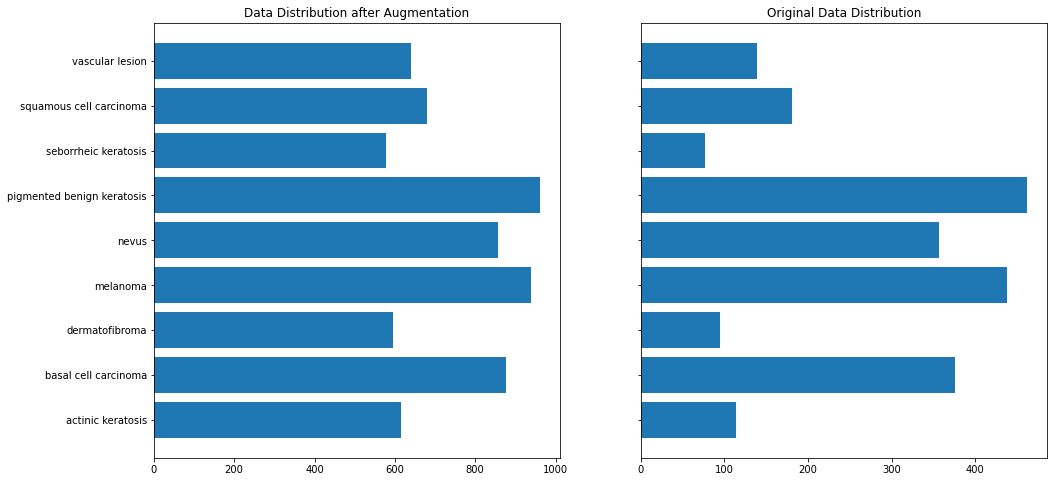

In [ ]:

# Displaying the distribution of the data post- and pre- augmentation

class_dist_2 = new_df['Lesion'].value_counts().sort_index().to_dict()

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16,8))

plt.subplot(ax[0])
plt.barh(list(class_dist_2.keys()), class_dist_2.values())
plt.title('Data Distribution after Augmentation')

plt.subplot(ax[1])
plt.barh(list(original_class_dist.keys()), original_class_dist.values())
plt.title('Original Data Distribution')

plt.show()



So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

### **Task 9: Repeating the steps for balanced augmented data**

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

**Create a training dataset**

In [ ]:
# Provide the path here
data_dir_train=os.path.join(path_to_training_dataset)

# Provide the subset value here
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size = (img_height, img_width),
  batch_size=batch_size,
  labels='inferred', 
  label_mode='categorical',
  color_mode='rgb',
  shuffle=True, )




Found 6739 files belonging to 9 classes.
Using 5392 files for training.


**Create a validation dataset**

In [ ]:
# Provide the subset value here
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size,
  labels='inferred', 
  label_mode='categorical',
  color_mode='rgb',
  shuffle=True, )

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


test_ds can be the same as there was no changes done to the data in the Test folder

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### **Create your model (make sure to include normalization)**

In [ ]:
### Your code goes here
input = Input(shape=(img_height, img_width, 3), name='input')
rescale = Rescaling(scale=1./255, name='rescale')(input) # output 180x180x3
x = Conv2D(16, 3, strides=1, padding='same', activation='relu')(rescale) # 90x90x64
x = BatchNormalization()(x)
x = MaxPooling2D(2)(x)
x = Conv2D(32, 3, strides=1, padding='same', activation='relu')(x) # 90x90x64
x = BatchNormalization()(x)
x = MaxPooling2D(2)(x)
x = Conv2D(64, 3, strides=1, padding='same', activation='relu')(x) # 45x45x128
x = BatchNormalization()(x)
x = MaxPooling2D(2)(x)
x = Conv2D(64, 3, strides=1, padding='same', activation='relu')(x) # 22x22x256

x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)

x = Dense(9, activation='softmax')(x)
model_3 = Model(inputs = input, outputs = x)
model_3.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 180, 180, 3)]     0         
                                                                 
 rescale (Rescaling)         (None, 180, 180, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 batch_normalization_4 (Batc  (None, 180, 180, 16)     64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 90, 90, 32)        4640

**Compile your model (Choose optimizer and loss function appropriately)**

In [ ]:
## Your code goes here

model_3.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005), 
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

**Train your model**

In [ ]:
# Note: Train your model for 30 epochs
## Your code goes here
epochs = 30

history = model_3.fit(
  train_ds,
  validation_data = val_ds,
  epochs=epochs,
  batch_size=batch_size,
  shuffle=True,
  callbacks = [
               TensorBoard(log_dir=os.path.join(base_dir,
                                                'logs',
                                                optimizer,
                                                'model_3'),
                            histogram_freq=1
                          )
               ])

Epoch 1/30
169/169 [==============================] - 34s 92ms/step - loss: 1.7878 - accuracy: 0.3743 - val_loss: 3.4297 - val_accuracy: 0.1730
Epoch 2/30
169/169 [==============================] - 6s 34ms/step - loss: 1.2476 - accuracy: 0.5514 - val_loss: 2.3378 - val_accuracy: 0.2457
Epoch 3/30
169/169 [==============================] - 6s 37ms/step - loss: 0.9058 - accuracy: 0.6652 - val_loss: 1.2044 - val_accuracy: 0.5486
Epoch 4/30
169/169 [==============================] - 7s 41ms/step - loss: 0.6767 - accuracy: 0.7533 - val_loss: 0.7891 - val_accuracy: 0.7045
Epoch 5/30
169/169 [==============================] - 7s 40ms/step - loss: 0.5134 - accuracy: 0.8077 - val_loss: 0.8113 - val_accuracy: 0.7127
Epoch 6/30
169/169 [==============================] - 6s 38ms/step - loss: 0.4628 - accuracy: 0.8301 - val_loss: 0.8881 - val_accuracy: 0.7290
Epoch 7/30
169/169 [==============================] - 7s 40ms/step - loss: 0.3778 - accuracy: 0.8507 - val_loss: 1.0940 - val_accuracy: 0.669

**Visualize the model results**

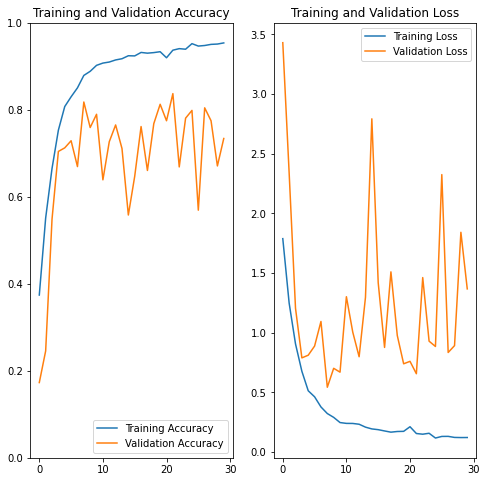

In [ ]:
# Graphs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylim([0., 1.])
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Model Evaluation on Test Data

In [ ]:
model_3.evaluate(test_ds)

4/4 [==============================] - 3s 22ms/step - loss: 6.5478 - accuracy: 0.3559


[6.54783296585083, 0.35593220591545105]

In [ ]:
# Since the data may be imbalanced, calculating the accuracy
# taking this into account using balanced_accuracy_score
count = 0
y_true = np.array([])
y_pred = np.array([])
for images, labels in test_ds:
  y_true = np.concatenate((y_true, tf.argmax(labels, 1)))
  y_pred = np.concatenate((y_pred,tf.argmax(model_3.predict(images), 1)))

print("Balanced Accuracy score =", balanced_accuracy_score(
                list(y_true.astype('uint8')), 
                list(y_pred.astype('uint8'))
                ))


Balanced Accuracy score = 0.412037037037037


### **Task 10: Analyzing the results** 


#### **Question:**
- Did you get rid of underfitting/overfitting from the model? 
- Did class rebalance help in the process?


#### Answers
* Overfitting is reduced.
* The class rebalance definitely helped in the process of improving accuracy on the Validation dataset

## Transfer Learning

In [ ]:
# %load_ext tensorboard
# %tensorboard --logdir /content/logs

### Frozen VGG16

In [ ]:
vgg16 = tf.keras.applications.vgg16.VGG16(
                include_top=False,
                weights='imagenet',
                input_shape=(img_height, img_width, 3),
            )


58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
# Freeze the vgg16 layer
vgg16.trainable = False

#### Model Creation

In [ ]:
input = Input(shape=(img_height, img_width, 3), name='input')
preprocessed = tf.keras.applications.vgg16.preprocess_input(input)
rescale = preprocessed# Rescaling(scale=1./255, name='rescale')(preprocessed) # output 180x180x3
x = vgg16(rescale)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(9, activation='softmax')(x)
model_4 = Model(inputs = input, outputs = x)


In [ ]:
model_4.compile(optimizer='adam',
              loss = tf.keras.losses.CategoricalCrossentropy(),#from_logits=True),
              metrics = ['accuracy'])
model_4.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 180, 180, 3)]     0         
                                                                 
 tf.__operators__.getitem_4   (None, 180, 180, 3)      0         
 (SlicingOpLambda)                                               
                                                                 
 tf.nn.bias_add_4 (TFOpLambd  (None, 180, 180, 3)      0         
 a)                                                              
                                                                 
 vgg16 (Functional)          (None, 5, 5, 512)         14714688  
                                                                 
 flatten_7 (Flatten)         (None, 12800)             0         
                                                                 
 dense_16 (Dense)            (None, 128)               1638

In [ ]:
history = model_4.fit(train_ds, 
                      batch_size=batch_size,
                      epochs=30,
                      validation_data=val_ds
                      )

Epoch 1/30
169/169 [==============================] - 26s 149ms/step - loss: 2.3808 - accuracy: 0.3160 - val_loss: 1.4232 - val_accuracy: 0.4833
Epoch 2/30
169/169 [==============================] - 23s 136ms/step - loss: 1.3665 - accuracy: 0.4844 - val_loss: 1.2176 - val_accuracy: 0.5687
Epoch 3/30
169/169 [==============================] - 23s 138ms/step - loss: 1.1608 - accuracy: 0.5525 - val_loss: 0.9102 - val_accuracy: 0.6800
Epoch 4/30
169/169 [==============================] - 23s 135ms/step - loss: 0.9966 - accuracy: 0.6131 - val_loss: 0.8182 - val_accuracy: 0.6986
Epoch 5/30
169/169 [==============================] - 23s 138ms/step - loss: 0.8570 - accuracy: 0.6530 - val_loss: 0.7830 - val_accuracy: 0.7298
Epoch 6/30
169/169 [==============================] - 23s 137ms/step - loss: 0.7710 - accuracy: 0.6897 - val_loss: 0.6712 - val_accuracy: 0.7595
Epoch 7/30
169/169 [==============================] - 23s 136ms/step - loss: 0.6816 - accuracy: 0.7233 - val_loss: 0.6094 - val_ac

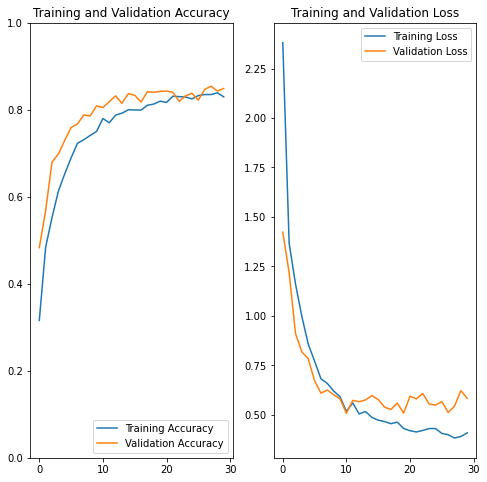

In [ ]:
# Graphs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylim([0., 1.])
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Model Evaluation

In [ ]:
model_4.evaluate(test_ds)

4/4 [==============================] - 5s 665ms/step - loss: 5.8664 - accuracy: 0.4322


[5.866407871246338, 0.43220338225364685]

In [ ]:
# Since the data may be imbalanced, calculating the accuracy
# taking this into account using balanced_accuracy_score
count = 0
y_true = np.array([])
y_pred = np.array([])
for images, labels in test_ds:
  y_true = np.concatenate((y_true, tf.argmax(labels, 1)))
  y_pred = np.concatenate((y_pred,tf.argmax(model_4.predict(images), 1)))

print("Balanced Accuracy score =", balanced_accuracy_score(
                list(y_true.astype('uint8')), 
                list(y_pred.astype('uint8'))
                ))


Balanced Accuracy score = 0.4444444444444444


### Trainable VGG16

Trying the architecture with a trainable VGG16

In [ ]:
vgg16 = tf.keras.applications.vgg16.VGG16(
                include_top=False,
                weights='imagenet',
                input_shape=(img_height, img_width, 3),
            )
vgg16.trainable=True

#### Model Train and Fit

In [ ]:
input = Input(shape=(img_height, img_width, 3), name='input')
rescale = Rescaling(scale=1./255, name='rescale')(input) # output 180x180x3
x = tf.keras.applications.vgg16.preprocess_input(rescale)
x = vgg16(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(9, activation='softmax')(x)
model_5 = Model(inputs = input, outputs = x)


In [ ]:
model_5.compile(optimizer='adam',
              loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics = ['accuracy'])
model_5.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 180, 180, 3)]     0         
                                                                 
 rescale (Rescaling)         (None, 180, 180, 3)       0         
                                                                 
 tf.__operators__.getitem_6   (None, 180, 180, 3)      0         
 (SlicingOpLambda)                                               
                                                                 
 tf.nn.bias_add_6 (TFOpLambd  (None, 180, 180, 3)      0         
 a)                                                              
                                                                 
 vgg16 (Functional)          (None, 5, 5, 512)         14714688  
                                                                 
 flatten_8 (Flatten)         (None, 12800)             0  

In [ ]:
history = model_5.fit(train_ds, 
                      batch_size=batch_size,
                      epochs=30,
                      validation_data=val_ds
                      )

Epoch 1/30
169/169 [==============================] - 57s 317ms/step - loss: 2.8302 - accuracy: 0.1369 - val_loss: 2.1903 - val_accuracy: 0.1403
Epoch 2/30
169/169 [==============================] - 51s 304ms/step - loss: 2.1827 - accuracy: 0.1413 - val_loss: 2.1873 - val_accuracy: 0.1403
Epoch 3/30
169/169 [==============================] - 51s 304ms/step - loss: 2.1780 - accuracy: 0.1463 - val_loss: 2.1870 - val_accuracy: 0.1403
Epoch 4/30
169/169 [==============================] - 52s 305ms/step - loss: 2.1773 - accuracy: 0.1395 - val_loss: 2.1874 - val_accuracy: 0.1403
Epoch 5/30
169/169 [==============================] - 51s 304ms/step - loss: 2.1769 - accuracy: 0.1397 - val_loss: 2.1875 - val_accuracy: 0.1403
Epoch 6/30
169/169 [==============================] - 51s 304ms/step - loss: 2.1775 - accuracy: 0.1354 - val_loss: 2.1874 - val_accuracy: 0.1403
Epoch 7/30
169/169 [==============================] - 52s 305ms/step - loss: 2.1765 - accuracy: 0.1439 - val_loss: 2.1876 - val_ac

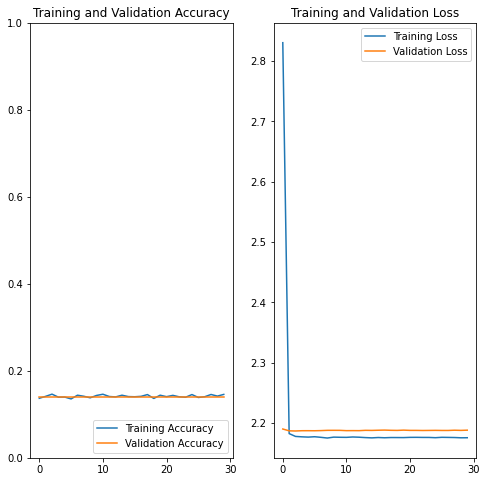

In [ ]:
# Graphs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylim([0., 1.])
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

As can be seen, the accuracy has worsened because we are trying to train 16M params with 5k images. Since the VGG16 model is pretrained to recognize features from imagenet, we should use an extremely low learning rate for this layer while keeping a nominal learning rate for the final FC layers

#### Model Evaluation

In [ ]:
model_5.evaluate(test_ds)

4/4 [==============================] - 3s 110ms/step - loss: 2.1708 - accuracy: 0.1356


[2.1707799434661865, 0.1355932205915451]

In [ ]:
# Since the data may be imbalanced, calculating the accuracy
# taking this into account using balanced_accuracy_score
count = 0
y_true = np.array([])
y_pred = np.array([])
for images, labels in test_ds:
  y_true = np.concatenate((y_true, tf.argmax(labels, 1)))
  y_pred = np.concatenate((y_pred,tf.argmax(model_5.predict(images), 1)))

print("Balanced Accuracy score =", balanced_accuracy_score(
                list(y_true.astype('uint8')), 
                list(y_pred.astype('uint8'))
                ))


Balanced Accuracy score = 0.1111111111111111


### Customized Training of VGG16

In [ ]:
vgg16 = tf.keras.applications.vgg16.VGG16(
                include_top=False,
                weights='imagenet',
                input_shape=(img_height, img_width, 3),
            )
vgg16.trainable=False

In [ ]:
input = Input(shape=(img_height, img_width, 3), name='input')
rescale = Rescaling(scale=1./255, name='rescale')(input) # output 180x180x3
x = tf.keras.applications.vgg16.preprocess_input(rescale)
x = vgg16(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(9, activation='softmax')(x)
model_5_v2 = Model(inputs = input, outputs = x)

model_5_v2.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 180, 180, 3)]     0         
                                                                 
 rescale (Rescaling)         (None, 180, 180, 3)       0         
                                                                 
 tf.__operators__.getitem_8   (None, 180, 180, 3)      0         
 (SlicingOpLambda)                                               
                                                                 
 tf.nn.bias_add_8 (TFOpLambd  (None, 180, 180, 3)      0         
 a)                                                              
                                                                 
 vgg16 (Functional)          (None, 5, 5, 512)         14714688  
                                                                 
 flatten_10 (Flatten)        (None, 12800)             0  

In [ ]:
# Define the Optimizer, Loss function and Metric function

adam = tf.keras.optimizers.Adam(learning_rate=0.001)
loss = tf.keras.losses.CategoricalCrossentropy()
metric = tf.keras.metrics.CategoricalAccuracy()


In [ ]:
# Number of epochs
epochs = 30
total_steps = train_ds.__len__()
for step in range(total_steps):




<tf.Tensor: shape=(), dtype=int64, numpy=169>

### Resnet50 - Frozen

In [ ]:
resnet50 = tf.keras.applications.resnet50.ResNet50(
                  include_top=False,
                  weights='imagenet',
                  input_shape=(img_height, img_width, 3),
                  )

94781440/94765736 [==============================] - 0s 0us/step


In [ ]:
resnet50.trainable = False

In [ ]:
input = Input(shape=(img_height, img_width, 3), name='input')
rescale = Rescaling(scale=1./255, name='rescale')(input) # output 180x180x3
x = tf.keras.applications.resnet50.preprocess_input(rescale)
x = resnet50(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(9, activation='softmax')(x)
model_6 = Model(inputs = input, outputs = x)


In [ ]:
model_6.compile(optimizer='adam',
              loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics = ['accuracy'])
model_6.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 180, 180, 3)]     0         
                                                                 
 rescale (Rescaling)         (None, 180, 180, 3)       0         
                                                                 
 tf.__operators__.getitem_7   (None, 180, 180, 3)      0         
 (SlicingOpLambda)                                               
                                                                 
 tf.nn.bias_add_7 (TFOpLambd  (None, 180, 180, 3)      0         
 a)                                                              
                                                                 
 resnet50 (Functional)       (None, 6, 6, 2048)        23587712  
                                                                 
 flatten_9 (Flatten)         (None, 73728)             0  

#### Model Train and Fit

In [ ]:
history = model_6.fit(train_ds, 
                      batch_size=batch_size,
                      epochs=30,
                      validation_data=val_ds
                      )

Epoch 1/30
169/169 [==============================] - 20s 101ms/step - loss: 2.4700 - accuracy: 0.1252 - val_loss: 2.1922 - val_accuracy: 0.1359
Epoch 2/30
169/169 [==============================] - 15s 91ms/step - loss: 2.2044 - accuracy: 0.1400 - val_loss: 2.1884 - val_accuracy: 0.1359
Epoch 3/30
169/169 [==============================] - 16s 94ms/step - loss: 2.1816 - accuracy: 0.1367 - val_loss: 2.1869 - val_accuracy: 0.1359
Epoch 4/30
169/169 [==============================] - 15s 91ms/step - loss: 2.1789 - accuracy: 0.1406 - val_loss: 2.1864 - val_accuracy: 0.1403
Epoch 5/30
169/169 [==============================] - 15s 90ms/step - loss: 2.1774 - accuracy: 0.1434 - val_loss: 2.1865 - val_accuracy: 0.1403
Epoch 6/30
169/169 [==============================] - 15s 91ms/step - loss: 2.1767 - accuracy: 0.1356 - val_loss: 2.1868 - val_accuracy: 0.1403
Epoch 7/30
169/169 [==============================] - 16s 92ms/step - loss: 2.1762 - accuracy: 0.1434 - val_loss: 2.1872 - val_accuracy

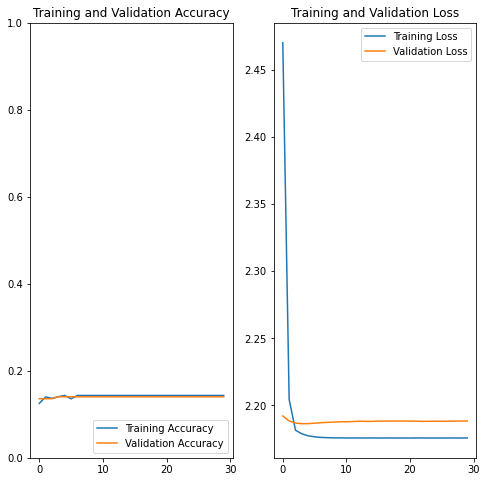

In [ ]:
# Graphs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylim([0., 1.])
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Model Evaluation

In [ ]:
model_6.evaluate(test_ds)

4/4 [==============================] - 6s 291ms/step - loss: 2.1723 - accuracy: 0.1356


[2.1723263263702393, 0.1355932205915451]